In [1]:
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from ecit import *


def ecit_simu_alpha(n_list=[2000, 4000],
              t = 1000,
              cit = kcit,
              k = 10,
              alphas=[0.5, 0.75, 1, 1.25, 1.5, 1.75, 2],
              show_progress=True):
    
    results = []

    for n in n_list:

        eI = [0] * len(alphas)
        eII = [0] * len(alphas)
        tim = 0
        start_time = time.time()
        iteration_loop = tqdm(range(t), desc=f"n={n}", leave=True, dynamic_ncols=True) if show_progress else range(t)

        for sed in iteration_loop:
            #np.random.seed(sed)
            #random.seed(sed)
            dataI = np.hstack((generate_samples(n=n,indp='C',z_dis='gaussian',noise_dis='laplace',noise_std=0.3)))
            dataII = np.hstack((generate_samples(n=n,indp='Nc',z_dis='gaussian',noise_dis='laplace',noise_std=0.3)))

            obj_ECIT = ECIT(dataI, cit, p_stable, k)
            _, pI_list = obj_ECIT([0], [1], [2], return_p_list=True)
            obj_ECIT = ECIT(dataII, cit, p_stable, k)
            _, pII_list = obj_ECIT([0], [1], [2], return_p_list=True)

            for j, alpha in enumerate(alphas):
                ensfunc = lambda p_list: p_stable(p_list, alpha=alpha)
                pI = ensfunc(pI_list)
                pII = ensfunc(pII_list)
                if pI<0.05:
                    eI[j] += 1
                if pII>0.05:
                    eII[j] += 1
    

        end_time = time.time()
        tim = end_time - start_time
        eI = [count / t for count in eI]
        eII = [count / t for count in eII]

        results.append({
            'n': n,
            'eI': eI,
            'eII': eII,
            'tim': tim
        })

    return results




def show_results_choose(results, alphas):
    
    fig, axes = plt.subplots(1, 3, figsize=(16, 4), dpi=500, sharex=True)

    ax_eI, ax_eII, ax_eSum = axes

    colors = cm.viridis(np.linspace(0.25, 0.85, len(results)))

    for res_dir, color in zip(results, colors):
        
        label = f"N = {res_dir['n']}"

        eI = np.array(res_dir['eI'])
        eII = np.array(res_dir['eII'])
        eSum = eI + eII

        ax_eI.plot(alphas, eI, label=label, color=color)
        ax_eII.plot(alphas, eII, color=color)
        ax_eSum.plot(alphas, eSum, color=color)

    ax_eI.set_ylim(0, 1)
    ax_eII.set_ylim(0, 1)
    ax_eSum.set_ylim(0, 1)
    
    ax_eI.set_ylabel("Error Rate")
    ax_eI.set_title("Type I Error")
    #ax_eI.set_xlabel("Sample Size (n)")
    
    ax_eII.set_title("Type II Error")
    #ax_eII.set_xlabel("Sample Size (n)")

    ax_eSum.set_title("Total Error Rate")
    #ax_eSum.set_xlabel("Sample Size (n)")

    fig.supxlabel("alpha", fontsize=11)
    fig.legend(loc='upper center', bbox_to_anchor=(0.51, -0.05), ncol=2, fontsize=12)

    ax_eI.set_xticks(alphas)
    ax_eII.set_xticks(alphas)
    ax_eSum.set_xticks(alphas)

    plt.tight_layout()
    plt.show()

2025-01-09 19:37:28.113992: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-09 19:37:28.115850: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-09 19:37:28.119305: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-09 19:37:28.130309: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736422648.149013     749 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736422648.15

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
n_list=[2000, 4000]
alphas=[0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
t = 100
k = 10

n=2000:   0%|                                                                                                         | 0/100 [00:00<?, ?it/s]

n=2000:   1%|▉                                                                                                | 1/100 [00:02<03:52,  2.34s/it]

n=2000:   2%|█▉                                                                                               | 2/100 [00:04<04:00,  2.45s/it]

n=2000:   3%|██▉                                                                                              | 3/100 [00:07<03:55,  2.43s/it]

n=2000:   4%|███▉                                                                                             | 4/100 [00:09<03:47,  2.37s/it]

n=2000:   5%|████▊                                                                                            | 5/100 [00:11<03:43,  2.36s/it]

n=2000:   6%|█████▊                                                                                           | 6/100 [00:14<03:39,  2.34s/it]

n=2000:   7%|██████▊                                                                                          | 7/100 [00:16<03:38,  2.35s/it]

n=2000:   8%|███████▊                                                                                         | 8/100 [00:18<03:33,  2.32s/it]

n=2000:   9%|████████▋                                                                                        | 9/100 [00:21<03:33,  2.35s/it]

n=2000:  10%|█████████▌                                                                                      | 10/100 [00:23<03:37,  2.41s/it]

n=2000:  11%|██████████▌                                                                                     | 11/100 [00:26<03:31,  2.37s/it]

n=2000:  12%|███████████▌                                                                                    | 12/100 [00:28<03:26,  2.35s/it]

n=2000:  13%|████████████▍                                                                                   | 13/100 [00:30<03:21,  2.31s/it]

n=2000:  14%|█████████████▍                                                                                  | 14/100 [00:32<03:16,  2.29s/it]

n=2000:  15%|██████████████▍                                                                                 | 15/100 [00:35<03:15,  2.29s/it]

n=2000:  16%|███████████████▎                                                                                | 16/100 [00:37<03:11,  2.28s/it]

n=2000:  17%|████████████████▎                                                                               | 17/100 [00:39<03:09,  2.29s/it]

n=2000:  18%|█████████████████▎                                                                              | 18/100 [00:41<03:07,  2.28s/it]

n=2000:  19%|██████████████████▏                                                                             | 19/100 [00:44<03:04,  2.28s/it]

n=2000:  20%|███████████████████▏                                                                            | 20/100 [00:46<03:09,  2.37s/it]

n=2000:  21%|████████████████████▏                                                                           | 21/100 [00:49<03:04,  2.34s/it]

n=2000:  22%|█████████████████████                                                                           | 22/100 [00:51<03:01,  2.32s/it]

n=2000:  23%|██████████████████████                                                                          | 23/100 [00:53<03:00,  2.35s/it]

n=2000:  24%|███████████████████████                                                                         | 24/100 [00:56<02:56,  2.32s/it]

n=2000:  25%|████████████████████████                                                                        | 25/100 [00:58<02:53,  2.31s/it]

n=2000:  26%|████████████████████████▉                                                                       | 26/100 [01:00<02:49,  2.29s/it]

n=2000:  27%|█████████████████████████▉                                                                      | 27/100 [01:02<02:45,  2.27s/it]

n=2000:  28%|██████████████████████████▉                                                                     | 28/100 [01:05<02:43,  2.27s/it]

n=2000:  29%|███████████████████████████▊                                                                    | 29/100 [01:07<02:42,  2.28s/it]

n=2000:  30%|████████████████████████████▊                                                                   | 30/100 [01:09<02:45,  2.36s/it]

n=2000:  31%|█████████████████████████████▊                                                                  | 31/100 [01:12<02:40,  2.33s/it]

n=2000:  32%|██████████████████████████████▋                                                                 | 32/100 [01:14<02:46,  2.45s/it]

n=2000:  33%|███████████████████████████████▋                                                                | 33/100 [01:17<02:42,  2.42s/it]

n=2000:  34%|████████████████████████████████▋                                                               | 34/100 [01:19<02:36,  2.38s/it]

n=2000:  35%|█████████████████████████████████▌                                                              | 35/100 [01:21<02:31,  2.34s/it]

n=2000:  36%|██████████████████████████████████▌                                                             | 36/100 [01:23<02:27,  2.30s/it]

n=2000:  37%|███████████████████████████████████▌                                                            | 37/100 [01:26<02:25,  2.31s/it]

n=2000:  38%|████████████████████████████████████▍                                                           | 38/100 [01:28<02:22,  2.31s/it]

n=2000:  39%|█████████████████████████████████████▍                                                          | 39/100 [01:30<02:19,  2.28s/it]

n=2000:  40%|██████████████████████████████████████▍                                                         | 40/100 [01:33<02:16,  2.27s/it]

n=2000:  41%|███████████████████████████████████████▎                                                        | 41/100 [01:35<02:14,  2.28s/it]

n=2000:  42%|████████████████████████████████████████▎                                                       | 42/100 [01:37<02:12,  2.28s/it]

n=2000:  43%|█████████████████████████████████████████▎                                                      | 43/100 [01:39<02:10,  2.29s/it]

n=2000:  44%|██████████████████████████████████████████▏                                                     | 44/100 [01:42<02:08,  2.29s/it]

n=2000:  45%|███████████████████████████████████████████▏                                                    | 45/100 [01:44<02:04,  2.27s/it]

n=2000:  46%|████████████████████████████████████████████▏                                                   | 46/100 [01:46<02:04,  2.31s/it]

n=2000:  47%|█████████████████████████████████████████████                                                   | 47/100 [01:49<02:02,  2.30s/it]

n=2000:  48%|██████████████████████████████████████████████                                                  | 48/100 [01:51<01:58,  2.28s/it]

n=2000:  49%|███████████████████████████████████████████████                                                 | 49/100 [01:53<01:56,  2.28s/it]

n=2000:  50%|████████████████████████████████████████████████                                                | 50/100 [01:56<01:56,  2.33s/it]

n=2000:  51%|████████████████████████████████████████████████▉                                               | 51/100 [01:58<01:52,  2.30s/it]

n=2000:  52%|█████████████████████████████████████████████████▉                                              | 52/100 [02:00<01:49,  2.28s/it]

n=2000:  53%|██████████████████████████████████████████████████▉                                             | 53/100 [02:02<01:46,  2.27s/it]

n=2000:  54%|███████████████████████████████████████████████████▊                                            | 54/100 [02:05<01:45,  2.29s/it]

n=2000:  55%|████████████████████████████████████████████████████▊                                           | 55/100 [02:07<01:42,  2.28s/it]

n=2000:  56%|█████████████████████████████████████████████████████▊                                          | 56/100 [02:09<01:39,  2.27s/it]

n=2000:  57%|██████████████████████████████████████████████████████▋                                         | 57/100 [02:11<01:36,  2.25s/it]

n=2000:  58%|███████████████████████████████████████████████████████▋                                        | 58/100 [02:14<01:34,  2.26s/it]

n=2000:  59%|████████████████████████████████████████████████████████▋                                       | 59/100 [02:16<01:34,  2.30s/it]

n=2000:  60%|█████████████████████████████████████████████████████████▌                                      | 60/100 [02:18<01:32,  2.30s/it]

n=2000:  61%|██████████████████████████████████████████████████████████▌                                     | 61/100 [02:21<01:29,  2.30s/it]

n=2000:  62%|███████████████████████████████████████████████████████████▌                                    | 62/100 [02:23<01:27,  2.30s/it]

n=2000:  63%|████████████████████████████████████████████████████████████▍                                   | 63/100 [02:25<01:25,  2.31s/it]

n=2000:  64%|█████████████████████████████████████████████████████████████▍                                  | 64/100 [02:28<01:22,  2.29s/it]

n=2000:  65%|██████████████████████████████████████████████████████████████▍                                 | 65/100 [02:30<01:19,  2.26s/it]

n=2000:  66%|███████████████████████████████████████████████████████████████▎                                | 66/100 [02:32<01:16,  2.26s/it]

n=2000:  67%|████████████████████████████████████████████████████████████████▎                               | 67/100 [02:34<01:14,  2.27s/it]

n=2000:  68%|█████████████████████████████████████████████████████████████████▎                              | 68/100 [02:37<01:13,  2.31s/it]

n=2000:  69%|██████████████████████████████████████████████████████████████████▏                             | 69/100 [02:39<01:10,  2.29s/it]

n=2000:  70%|███████████████████████████████████████████████████████████████████▏                            | 70/100 [02:41<01:08,  2.27s/it]

n=2000:  71%|████████████████████████████████████████████████████████████████████▏                           | 71/100 [02:44<01:09,  2.39s/it]

n=2000:  72%|█████████████████████████████████████████████████████████████████████                           | 72/100 [02:46<01:08,  2.44s/it]

n=2000:  73%|██████████████████████████████████████████████████████████████████████                          | 73/100 [02:49<01:04,  2.38s/it]

n=2000:  74%|███████████████████████████████████████████████████████████████████████                         | 74/100 [02:51<01:00,  2.33s/it]

n=2000:  75%|████████████████████████████████████████████████████████████████████████                        | 75/100 [02:53<00:58,  2.32s/it]

n=2000:  76%|████████████████████████████████████████████████████████████████████████▉                       | 76/100 [02:56<00:58,  2.45s/it]

n=2000:  77%|█████████████████████████████████████████████████████████████████████████▉                      | 77/100 [02:58<00:55,  2.43s/it]

n=2000:  78%|██████████████████████████████████████████████████████████████████████████▉                     | 78/100 [03:01<00:56,  2.58s/it]

n=2000:  79%|███████████████████████████████████████████████████████████████████████████▊                    | 79/100 [03:03<00:51,  2.47s/it]

n=2000:  80%|████████████████████████████████████████████████████████████████████████████▊                   | 80/100 [03:06<00:48,  2.43s/it]

n=2000:  81%|█████████████████████████████████████████████████████████████████████████████▊                  | 81/100 [03:08<00:45,  2.38s/it]

n=2000:  82%|██████████████████████████████████████████████████████████████████████████████▋                 | 82/100 [03:10<00:42,  2.37s/it]

n=2000:  83%|███████████████████████████████████████████████████████████████████████████████▋                | 83/100 [03:13<00:39,  2.31s/it]

n=2000:  84%|████████████████████████████████████████████████████████████████████████████████▋               | 84/100 [03:15<00:36,  2.30s/it]

n=2000:  85%|█████████████████████████████████████████████████████████████████████████████████▌              | 85/100 [03:17<00:34,  2.28s/it]

n=2000:  86%|██████████████████████████████████████████████████████████████████████████████████▌             | 86/100 [03:19<00:32,  2.31s/it]

n=2000:  87%|███████████████████████████████████████████████████████████████████████████████████▌            | 87/100 [03:22<00:29,  2.29s/it]

n=2000:  88%|████████████████████████████████████████████████████████████████████████████████████▍           | 88/100 [03:24<00:27,  2.27s/it]

n=2000:  89%|█████████████████████████████████████████████████████████████████████████████████████▍          | 89/100 [03:27<00:26,  2.40s/it]

n=2000:  90%|██████████████████████████████████████████████████████████████████████████████████████▍         | 90/100 [03:29<00:23,  2.36s/it]

n=2000:  91%|███████████████████████████████████████████████████████████████████████████████████████▎        | 91/100 [03:31<00:21,  2.34s/it]

n=2000:  92%|████████████████████████████████████████████████████████████████████████████████████████▎       | 92/100 [03:33<00:18,  2.33s/it]

n=2000:  93%|█████████████████████████████████████████████████████████████████████████████████████████▎      | 93/100 [03:36<00:16,  2.37s/it]

n=2000:  94%|██████████████████████████████████████████████████████████████████████████████████████████▏     | 94/100 [03:38<00:13,  2.33s/it]

n=2000:  95%|███████████████████████████████████████████████████████████████████████████████████████████▏    | 95/100 [03:40<00:11,  2.30s/it]

n=2000:  96%|████████████████████████████████████████████████████████████████████████████████████████████▏   | 96/100 [03:43<00:09,  2.29s/it]

n=2000:  97%|█████████████████████████████████████████████████████████████████████████████████████████████   | 97/100 [03:45<00:06,  2.27s/it]

n=2000:  98%|██████████████████████████████████████████████████████████████████████████████████████████████  | 98/100 [03:47<00:04,  2.28s/it]

n=2000:  99%|███████████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [03:49<00:02,  2.25s/it]

n=2000: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [03:52<00:00,  2.24s/it]

n=2000: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [03:52<00:00,  2.32s/it]

n=4000:   0%|                                                                                                         | 0/100 [00:00<?, ?it/s]

n=4000:   1%|▉                                                                                                | 1/100 [00:03<06:30,  3.94s/it]

n=4000:   2%|█▉                                                                                               | 2/100 [00:10<09:19,  5.71s/it]

n=4000:   3%|██▉                                                                                              | 3/100 [00:14<08:02,  4.98s/it]

n=4000:   4%|███▉                                                                                             | 4/100 [00:18<07:15,  4.53s/it]

n=4000:   5%|████▊                                                                                            | 5/100 [00:22<06:45,  4.26s/it]

n=4000:   6%|█████▊                                                                                           | 6/100 [00:26<06:32,  4.17s/it]

n=4000:   7%|██████▊                                                                                          | 7/100 [00:30<06:21,  4.11s/it]

n=4000:   8%|███████▊                                                                                         | 8/100 [00:34<06:10,  4.03s/it]

n=4000:   9%|████████▋                                                                                        | 9/100 [00:38<06:01,  3.97s/it]

n=4000:  10%|█████████▌                                                                                      | 10/100 [00:43<06:33,  4.37s/it]

n=4000:  11%|██████████▌                                                                                     | 11/100 [00:47<06:21,  4.29s/it]

n=4000:  12%|███████████▌                                                                                    | 12/100 [00:51<06:02,  4.11s/it]

n=4000:  13%|████████████▍                                                                                   | 13/100 [00:55<05:51,  4.04s/it]

n=4000:  14%|█████████████▍                                                                                  | 14/100 [00:59<05:39,  3.95s/it]

n=4000:  15%|██████████████▍                                                                                 | 15/100 [01:03<05:43,  4.04s/it]

n=4000:  16%|███████████████▎                                                                                | 16/100 [01:07<05:45,  4.11s/it]

n=4000:  17%|████████████████▎                                                                               | 17/100 [01:11<05:35,  4.04s/it]

n=4000:  18%|█████████████████▎                                                                              | 18/100 [01:15<05:31,  4.04s/it]

n=4000:  19%|██████████████████▏                                                                             | 19/100 [01:19<05:22,  3.98s/it]

n=4000:  20%|███████████████████▏                                                                            | 20/100 [01:23<05:15,  3.95s/it]

n=4000:  21%|████████████████████▏                                                                           | 21/100 [01:26<05:08,  3.90s/it]

n=4000:  22%|█████████████████████                                                                           | 22/100 [01:30<05:02,  3.88s/it]

n=4000:  23%|██████████████████████                                                                          | 23/100 [01:34<05:02,  3.93s/it]

n=4000:  24%|███████████████████████                                                                         | 24/100 [01:38<05:01,  3.97s/it]

n=4000:  25%|████████████████████████                                                                        | 25/100 [01:42<04:57,  3.97s/it]

n=4000:  26%|████████████████████████▉                                                                       | 26/100 [01:47<05:04,  4.11s/it]

n=4000:  27%|█████████████████████████▉                                                                      | 27/100 [01:51<04:53,  4.02s/it]

n=4000:  28%|██████████████████████████▉                                                                     | 28/100 [01:55<04:50,  4.04s/it]

n=4000:  29%|███████████████████████████▊                                                                    | 29/100 [01:59<04:43,  4.00s/it]

n=4000:  30%|████████████████████████████▊                                                                   | 30/100 [02:03<04:40,  4.01s/it]

n=4000:  31%|█████████████████████████████▊                                                                  | 31/100 [02:09<05:26,  4.73s/it]

n=4000:  32%|██████████████████████████████▋                                                                 | 32/100 [02:13<05:07,  4.52s/it]

n=4000:  33%|███████████████████████████████▋                                                                | 33/100 [02:17<04:51,  4.35s/it]

n=4000:  34%|████████████████████████████████▋                                                               | 34/100 [02:21<04:37,  4.21s/it]

n=4000:  35%|█████████████████████████████████▌                                                              | 35/100 [02:25<04:26,  4.10s/it]

n=4000:  36%|██████████████████████████████████▌                                                             | 36/100 [02:29<04:25,  4.15s/it]

n=4000:  37%|███████████████████████████████████▌                                                            | 37/100 [02:33<04:15,  4.06s/it]

n=4000:  38%|████████████████████████████████████▍                                                           | 38/100 [02:37<04:07,  3.99s/it]

n=4000:  39%|█████████████████████████████████████▍                                                          | 39/100 [02:41<04:04,  4.00s/it]

n=4000:  40%|██████████████████████████████████████▍                                                         | 40/100 [02:45<04:03,  4.06s/it]

n=4000:  41%|███████████████████████████████████████▎                                                        | 41/100 [02:49<03:55,  4.00s/it]

n=4000:  42%|████████████████████████████████████████▎                                                       | 42/100 [02:53<03:48,  3.95s/it]

n=4000:  43%|█████████████████████████████████████████▎                                                      | 43/100 [02:56<03:42,  3.91s/it]

n=4000:  44%|██████████████████████████████████████████▏                                                     | 44/100 [03:00<03:37,  3.88s/it]

n=4000:  45%|███████████████████████████████████████████▏                                                    | 45/100 [03:04<03:34,  3.91s/it]

n=4000:  46%|████████████████████████████████████████████▏                                                   | 46/100 [03:08<03:30,  3.89s/it]

n=4000:  47%|█████████████████████████████████████████████                                                   | 47/100 [03:12<03:25,  3.87s/it]

n=4000:  48%|██████████████████████████████████████████████                                                  | 48/100 [03:16<03:27,  4.00s/it]

n=4000:  49%|███████████████████████████████████████████████                                                 | 49/100 [03:20<03:22,  3.96s/it]

n=4000:  50%|████████████████████████████████████████████████                                                | 50/100 [03:24<03:17,  3.95s/it]

n=4000:  51%|████████████████████████████████████████████████▉                                               | 51/100 [03:28<03:13,  3.94s/it]

n=4000:  52%|█████████████████████████████████████████████████▉                                              | 52/100 [03:32<03:07,  3.90s/it]

n=4000:  53%|██████████████████████████████████████████████████▉                                             | 53/100 [03:36<03:04,  3.93s/it]

n=4000:  54%|███████████████████████████████████████████████████▊                                            | 54/100 [03:40<02:59,  3.90s/it]

n=4000:  55%|████████████████████████████████████████████████████▊                                           | 55/100 [03:43<02:55,  3.91s/it]

n=4000:  56%|█████████████████████████████████████████████████████▊                                          | 56/100 [03:47<02:51,  3.89s/it]

n=4000:  57%|██████████████████████████████████████████████████████▋                                         | 57/100 [03:51<02:45,  3.86s/it]

n=4000:  58%|███████████████████████████████████████████████████████▋                                        | 58/100 [03:55<02:43,  3.89s/it]

n=4000:  59%|████████████████████████████████████████████████████████▋                                       | 59/100 [03:59<02:39,  3.88s/it]

n=4000:  60%|█████████████████████████████████████████████████████████▌                                      | 60/100 [04:03<02:34,  3.87s/it]

n=4000:  61%|██████████████████████████████████████████████████████████▌                                     | 61/100 [04:07<02:30,  3.86s/it]

n=4000:  62%|███████████████████████████████████████████████████████████▌                                    | 62/100 [04:10<02:25,  3.83s/it]

n=4000:  63%|████████████████████████████████████████████████████████████▍                                   | 63/100 [04:14<02:24,  3.91s/it]

n=4000:  64%|█████████████████████████████████████████████████████████████▍                                  | 64/100 [04:20<02:41,  4.49s/it]

n=4000:  65%|██████████████████████████████████████████████████████████████▍                                 | 65/100 [04:24<02:32,  4.36s/it]

n=4000:  66%|███████████████████████████████████████████████████████████████▎                                | 66/100 [04:28<02:22,  4.20s/it]

n=4000:  67%|████████████████████████████████████████████████████████████████▎                               | 67/100 [04:32<02:15,  4.10s/it]

n=4000:  68%|█████████████████████████████████████████████████████████████████▎                              | 68/100 [04:36<02:12,  4.13s/it]

n=4000:  69%|██████████████████████████████████████████████████████████████████▏                             | 69/100 [04:40<02:05,  4.06s/it]

n=4000:  70%|███████████████████████████████████████████████████████████████████▏                            | 70/100 [04:44<02:02,  4.07s/it]

n=4000:  71%|████████████████████████████████████████████████████████████████████▏                           | 71/100 [04:48<01:55,  3.99s/it]

n=4000:  72%|█████████████████████████████████████████████████████████████████████                           | 72/100 [04:52<01:50,  3.95s/it]

n=4000:  73%|██████████████████████████████████████████████████████████████████████                          | 73/100 [04:56<01:47,  3.97s/it]

n=4000:  74%|███████████████████████████████████████████████████████████████████████                         | 74/100 [05:00<01:41,  3.92s/it]

n=4000:  75%|████████████████████████████████████████████████████████████████████████                        | 75/100 [05:04<01:37,  3.88s/it]

n=4000:  76%|████████████████████████████████████████████████████████████████████████▉                       | 76/100 [05:07<01:32,  3.87s/it]

n=4000:  77%|█████████████████████████████████████████████████████████████████████████▉                      | 77/100 [05:11<01:28,  3.86s/it]

n=4000:  78%|██████████████████████████████████████████████████████████████████████████▉                     | 78/100 [05:15<01:25,  3.89s/it]

n=4000:  79%|███████████████████████████████████████████████████████████████████████████▊                    | 79/100 [05:19<01:21,  3.90s/it]

n=4000:  80%|████████████████████████████████████████████████████████████████████████████▊                   | 80/100 [05:23<01:17,  3.89s/it]

n=4000:  81%|█████████████████████████████████████████████████████████████████████████████▊                  | 81/100 [05:27<01:16,  4.03s/it]

n=4000:  82%|██████████████████████████████████████████████████████████████████████████████▋                 | 82/100 [05:31<01:12,  4.01s/it]

n=4000:  83%|███████████████████████████████████████████████████████████████████████████████▋                | 83/100 [05:35<01:08,  4.03s/it]

n=4000:  84%|████████████████████████████████████████████████████████████████████████████████▋               | 84/100 [05:39<01:03,  3.97s/it]

n=4000:  85%|█████████████████████████████████████████████████████████████████████████████████▌              | 85/100 [05:43<00:59,  3.95s/it]

n=4000:  86%|██████████████████████████████████████████████████████████████████████████████████▌             | 86/100 [05:47<00:54,  3.90s/it]

n=4000:  87%|███████████████████████████████████████████████████████████████████████████████████▌            | 87/100 [05:51<00:50,  3.91s/it]

n=4000:  88%|████████████████████████████████████████████████████████████████████████████████████▍           | 88/100 [05:55<00:47,  3.96s/it]

n=4000:  89%|█████████████████████████████████████████████████████████████████████████████████████▍          | 89/100 [05:59<00:43,  3.96s/it]

n=4000:  90%|██████████████████████████████████████████████████████████████████████████████████████▍         | 90/100 [06:03<00:39,  3.92s/it]

n=4000:  91%|███████████████████████████████████████████████████████████████████████████████████████▎        | 91/100 [06:07<00:35,  3.93s/it]

n=4000:  92%|████████████████████████████████████████████████████████████████████████████████████████▎       | 92/100 [06:11<00:31,  3.98s/it]

n=4000:  93%|█████████████████████████████████████████████████████████████████████████████████████████▎      | 93/100 [06:15<00:28,  4.01s/it]

n=4000:  94%|██████████████████████████████████████████████████████████████████████████████████████████▏     | 94/100 [06:19<00:23,  3.98s/it]

n=4000:  95%|███████████████████████████████████████████████████████████████████████████████████████████▏    | 95/100 [06:23<00:19,  3.96s/it]

n=4000:  96%|████████████████████████████████████████████████████████████████████████████████████████████▏   | 96/100 [06:26<00:15,  3.93s/it]

n=4000:  97%|█████████████████████████████████████████████████████████████████████████████████████████████   | 97/100 [06:30<00:11,  3.92s/it]

n=4000:  98%|██████████████████████████████████████████████████████████████████████████████████████████████  | 98/100 [06:35<00:08,  4.23s/it]

n=4000:  99%|███████████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [06:39<00:04,  4.11s/it]

n=4000: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [06:43<00:00,  4.06s/it]

n=4000: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [06:43<00:00,  4.04s/it]

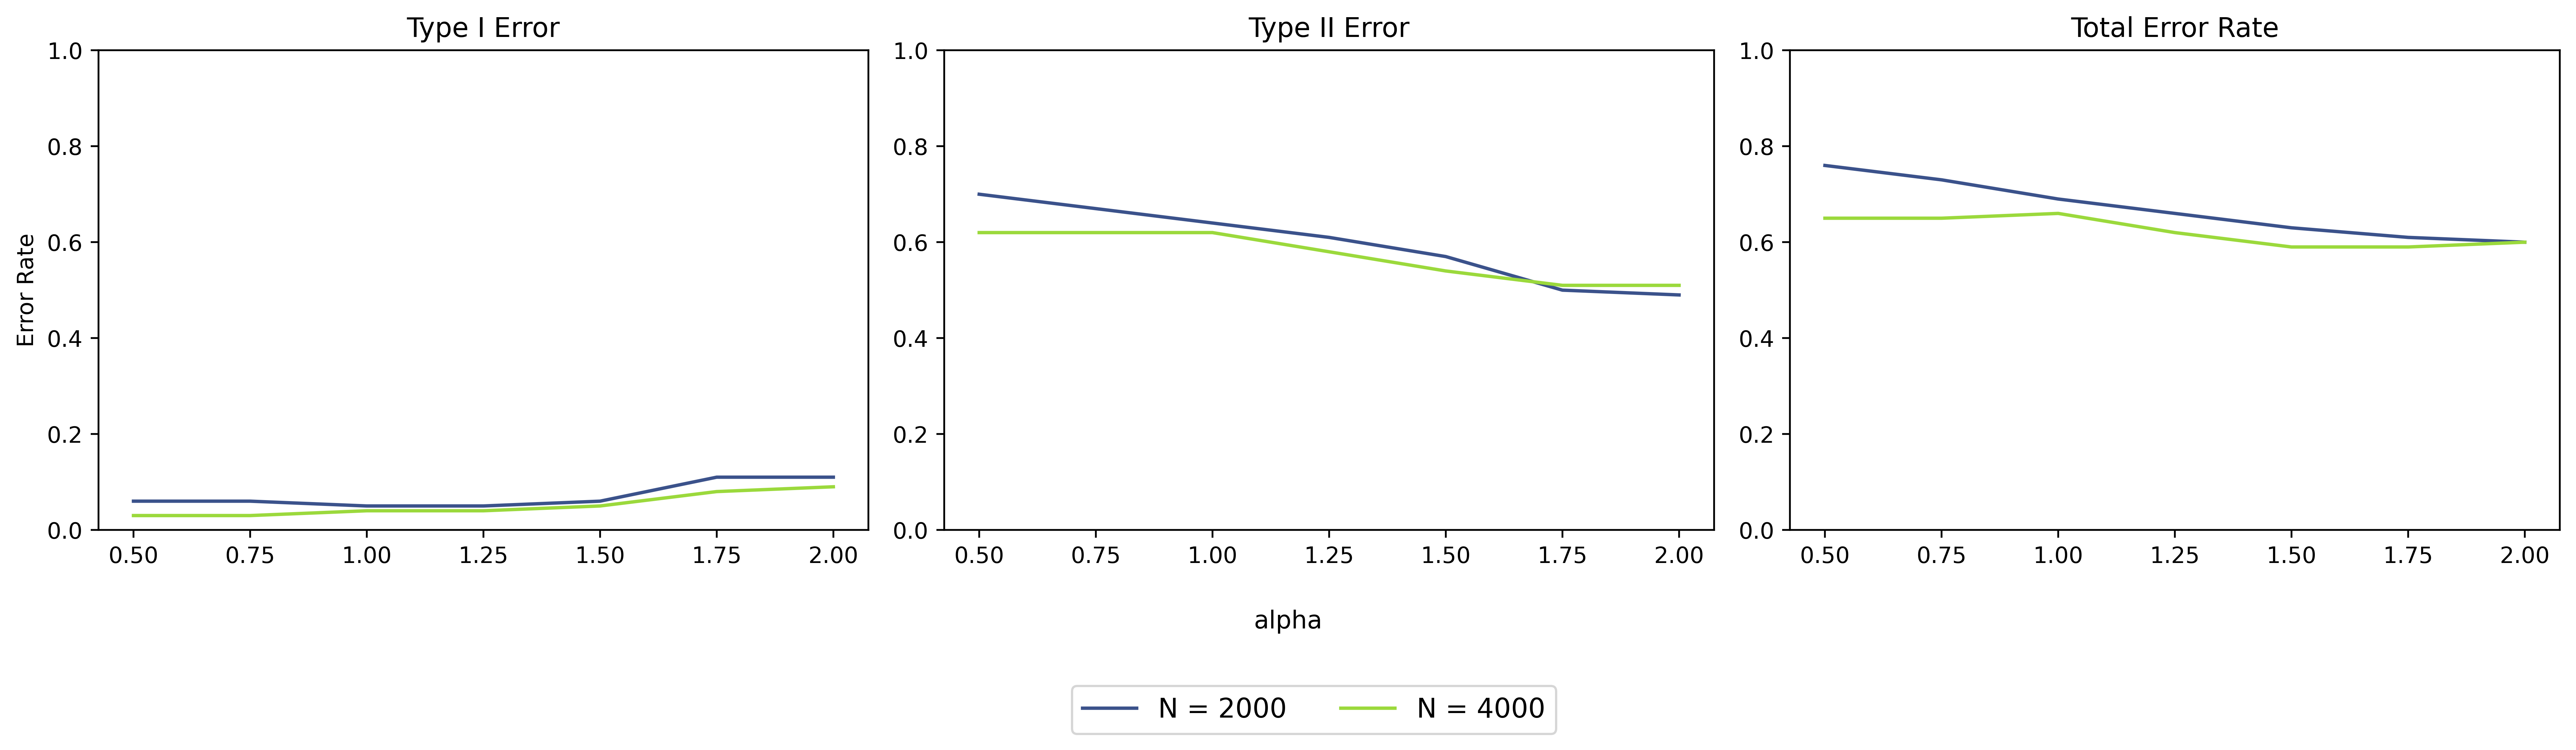

[{'n': 2000,
  'eI': [0.06, 0.06, 0.05, 0.05, 0.06, 0.11, 0.11],
  'eII': [0.7, 0.67, 0.64, 0.61, 0.57, 0.5, 0.49],
  'tim': 232.0285198688507},
 {'n': 4000,
  'eI': [0.03, 0.03, 0.04, 0.04, 0.05, 0.08, 0.09],
  'eII': [0.62, 0.62, 0.62, 0.58, 0.54, 0.51, 0.51],
  'tim': 403.56935930252075}]

In [3]:
cit = kcit
results = ecit_simu_alpha(n_list=n_list, t=t, cit=cit, k=k, alphas=alphas)
show_results_choose(results, alphas)
results

n=2000:   0%|                                                                                                         | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


n=2000:   1%|▉                                                                                             | 1/100 [02:01<3:20:39, 121.61s/it]

n=2000:   2%|█▉                                                                                            | 2/100 [04:02<3:17:44, 121.07s/it]

n=2000:   3%|██▊                                                                                           | 3/100 [06:05<3:17:22, 122.09s/it]

n=2000:   4%|███▊                                                                                          | 4/100 [08:08<3:15:35, 122.25s/it]

n=2000:   5%|████▋                                                                                         | 5/100 [10:09<3:13:03, 121.93s/it]

n=2000:   6%|█████▋                                                                                        | 6/100 [12:11<3:10:56, 121.87s/it]

n=2000:   7%|██████▌                                                                                       | 7/100 [14:14<3:09:28, 122.24s/it]

/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


n=2000:   8%|███████▌                                                                                      | 8/100 [16:19<3:08:47, 123.13s/it]

n=2000:   9%|████████▍                                                                                     | 9/100 [18:20<3:05:43, 122.45s/it]

n=2000:  10%|█████████▎                                                                                   | 10/100 [20:20<3:02:53, 121.93s/it]

n=2000:  11%|██████████▏                                                                                  | 11/100 [22:26<3:02:43, 123.18s/it]

n=2000:  12%|███████████▏                                                                                 | 12/100 [24:30<3:00:35, 123.13s/it]

n=2000:  13%|████████████                                                                                 | 13/100 [26:32<2:58:16, 122.95s/it]

n=2000:  14%|█████████████                                                                                | 14/100 [28:34<2:55:35, 122.51s/it]

n=2000:  15%|█████████████▉                                                                               | 15/100 [30:36<2:53:26, 122.43s/it]

n=2000:  16%|██████████████▉                                                                              | 16/100 [32:40<2:52:03, 122.89s/it]

n=2000:  17%|███████████████▊                                                                             | 17/100 [34:42<2:49:44, 122.71s/it]

n=2000:  18%|████████████████▋                                                                            | 18/100 [36:44<2:47:22, 122.46s/it]

n=2000:  19%|█████████████████▋                                                                           | 19/100 [38:47<2:45:43, 122.76s/it]

n=2000:  20%|██████████████████▌                                                                          | 20/100 [40:52<2:44:32, 123.41s/it]

n=2000:  21%|███████████████████▌                                                                         | 21/100 [42:57<2:42:49, 123.67s/it]

n=2000:  22%|████████████████████▍                                                                        | 22/100 [45:00<2:40:40, 123.60s/it]

n=2000:  23%|█████████████████████▍                                                                       | 23/100 [47:04<2:38:47, 123.73s/it]

n=2000:  24%|██████████████████████▎                                                                      | 24/100 [49:06<2:36:04, 123.21s/it]

n=2000:  25%|███████████████████████▎                                                                     | 25/100 [51:10<2:34:17, 123.43s/it]

n=2000:  26%|████████████████████████▏                                                                    | 26/100 [53:11<2:31:18, 122.68s/it]

n=2000:  27%|█████████████████████████                                                                    | 27/100 [55:17<2:30:20, 123.57s/it]

n=2000:  28%|██████████████████████████                                                                   | 28/100 [57:19<2:27:55, 123.27s/it]

n=2000:  29%|██████████████████████████▉                                                                  | 29/100 [59:22<2:25:48, 123.22s/it]

n=2000:  30%|███████████████████████████▎                                                               | 30/100 [1:01:25<2:23:41, 123.16s/it]

n=2000:  31%|████████████████████████████▏                                                              | 31/100 [1:03:30<2:22:16, 123.71s/it]

n=2000:  32%|█████████████████████████████                                                              | 32/100 [1:05:34<2:20:20, 123.83s/it]

n=2000:  33%|██████████████████████████████                                                             | 33/100 [1:07:37<2:17:56, 123.53s/it]

n=2000:  34%|██████████████████████████████▉                                                            | 34/100 [1:09:39<2:15:15, 122.96s/it]

n=2000:  35%|███████████████████████████████▊                                                           | 35/100 [1:11:44<2:13:52, 123.58s/it]

n=2000:  36%|████████████████████████████████▊                                                          | 36/100 [1:13:47<2:11:46, 123.54s/it]

n=2000:  37%|█████████████████████████████████▋                                                         | 37/100 [1:15:51<2:09:49, 123.64s/it]

n=2000:  38%|██████████████████████████████████▌                                                        | 38/100 [1:17:56<2:08:07, 123.99s/it]

n=2000:  39%|███████████████████████████████████▍                                                       | 39/100 [1:20:02<2:06:34, 124.51s/it]

n=2000:  40%|████████████████████████████████████▍                                                      | 40/100 [1:22:04<2:03:54, 123.91s/it]

n=2000:  41%|█████████████████████████████████████▎                                                     | 41/100 [1:24:07<2:01:38, 123.71s/it]

n=2000:  42%|██████████████████████████████████████▏                                                    | 42/100 [1:26:09<1:58:49, 122.93s/it]

n=2000:  43%|███████████████████████████████████████▏                                                   | 43/100 [1:28:14<1:57:22, 123.56s/it]

n=2000:  44%|████████████████████████████████████████                                                   | 44/100 [1:30:17<1:55:20, 123.57s/it]

n=2000:  45%|████████████████████████████████████████▉                                                  | 45/100 [1:32:22<1:53:34, 123.90s/it]

n=2000:  46%|█████████████████████████████████████████▊                                                 | 46/100 [1:34:24<1:51:08, 123.49s/it]

n=2000:  47%|██████████████████████████████████████████▊                                                | 47/100 [1:36:28<1:49:00, 123.40s/it]

n=2000:  48%|███████████████████████████████████████████▋                                               | 48/100 [1:38:30<1:46:46, 123.20s/it]

n=2000:  49%|████████████████████████████████████████████▌                                              | 49/100 [1:40:34<1:44:51, 123.36s/it]

n=2000:  50%|█████████████████████████████████████████████▌                                             | 50/100 [1:42:36<1:42:28, 122.97s/it]

n=2000:  51%|██████████████████████████████████████████████▍                                            | 51/100 [1:44:39<1:40:18, 122.82s/it]

n=2000:  52%|███████████████████████████████████████████████▎                                           | 52/100 [1:46:41<1:38:04, 122.60s/it]

n=2000:  53%|████████████████████████████████████████████████▏                                          | 53/100 [1:48:44<1:36:08, 122.74s/it]

n=2000:  54%|█████████████████████████████████████████████████▏                                         | 54/100 [1:50:45<1:33:47, 122.34s/it]

n=2000:  55%|██████████████████████████████████████████████████                                         | 55/100 [1:52:47<1:31:39, 122.21s/it]

n=2000:  56%|██████████████████████████████████████████████████▉                                        | 56/100 [1:54:51<1:29:56, 122.65s/it]

n=2000:  57%|███████████████████████████████████████████████████▊                                       | 57/100 [1:56:55<1:28:15, 123.16s/it]

n=2000:  58%|████████████████████████████████████████████████████▊                                      | 58/100 [1:58:57<1:26:02, 122.91s/it]

n=2000:  59%|█████████████████████████████████████████████████████▋                                     | 59/100 [2:00:59<1:23:46, 122.59s/it]

n=2000:  60%|██████████████████████████████████████████████████████▌                                    | 60/100 [2:03:02<1:21:40, 122.51s/it]

n=2000:  61%|███████████████████████████████████████████████████████▌                                   | 61/100 [2:05:06<1:19:56, 122.99s/it]

n=2000:  62%|████████████████████████████████████████████████████████▍                                  | 62/100 [2:07:09<1:18:00, 123.17s/it]

n=2000:  63%|█████████████████████████████████████████████████████████▎                                 | 63/100 [2:09:13<1:16:04, 123.35s/it]

n=2000:  64%|██████████████████████████████████████████████████████████▏                                | 64/100 [2:11:17<1:14:02, 123.40s/it]

n=2000:  65%|███████████████████████████████████████████████████████████▏                               | 65/100 [2:13:18<1:11:38, 122.82s/it]

n=2000:  66%|████████████████████████████████████████████████████████████                               | 66/100 [2:15:22<1:09:46, 123.12s/it]

n=2000:  67%|████████████████████████████████████████████████████████████▉                              | 67/100 [2:17:26<1:07:49, 123.33s/it]

n=2000:  68%|█████████████████████████████████████████████████████████████▉                             | 68/100 [2:19:29<1:05:44, 123.26s/it]

n=2000:  69%|██████████████████████████████████████████████████████████████▊                            | 69/100 [2:21:30<1:03:23, 122.71s/it]

n=2000:  70%|███████████████████████████████████████████████████████████████▋                           | 70/100 [2:23:34<1:01:31, 123.04s/it]

n=2000:  71%|██████████████████████████████████████████████████████████████████                           | 71/100 [2:25:38<59:39, 123.43s/it]

n=2000:  72%|██████████████████████████████████████████████████████████████████▉                          | 72/100 [2:27:41<57:31, 123.25s/it]

n=2000:  73%|███████████████████████████████████████████████████████████████████▉                         | 73/100 [2:29:44<55:25, 123.15s/it]

n=2000:  74%|████████████████████████████████████████████████████████████████████▊                        | 74/100 [2:31:46<53:15, 122.92s/it]

n=2000:  75%|█████████████████████████████████████████████████████████████████████▊                       | 75/100 [2:33:50<51:15, 123.01s/it]

n=2000:  76%|██████████████████████████████████████████████████████████████████████▋                      | 76/100 [2:35:54<49:20, 123.37s/it]

n=2000:  77%|███████████████████████████████████████████████████████████████████████▌                     | 77/100 [2:37:57<47:16, 123.33s/it]

n=2000:  78%|████████████████████████████████████████████████████████████████████████▌                    | 78/100 [2:39:59<45:03, 122.88s/it]

n=2000:  79%|█████████████████████████████████████████████████████████████████████████▍                   | 79/100 [2:42:02<43:00, 122.86s/it]

n=2000:  80%|██████████████████████████████████████████████████████████████████████████▍                  | 80/100 [2:44:06<41:04, 123.23s/it]

n=2000:  81%|███████████████████████████████████████████████████████████████████████████▎                 | 81/100 [2:46:10<39:05, 123.45s/it]

n=2000:  82%|████████████████████████████████████████████████████████████████████████████▎                | 82/100 [2:48:12<36:56, 123.13s/it]

n=2000:  83%|█████████████████████████████████████████████████████████████████████████████▏               | 83/100 [2:50:14<34:48, 122.88s/it]

n=2000:  84%|██████████████████████████████████████████████████████████████████████████████               | 84/100 [2:52:19<32:53, 123.37s/it]

n=2000:  85%|███████████████████████████████████████████████████████████████████████████████              | 85/100 [2:54:22<30:47, 123.17s/it]

n=2000:  86%|███████████████████████████████████████████████████████████████████████████████▉             | 86/100 [2:56:25<28:43, 123.08s/it]

n=2000:  87%|████████████████████████████████████████████████████████████████████████████████▉            | 87/100 [2:58:28<26:39, 123.06s/it]

n=2000:  88%|█████████████████████████████████████████████████████████████████████████████████▊           | 88/100 [3:00:32<24:41, 123.49s/it]

n=2000:  89%|██████████████████████████████████████████████████████████████████████████████████▊          | 89/100 [3:02:34<22:33, 123.08s/it]

/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


n=2000:  90%|███████████████████████████████████████████████████████████████████████████████████▋         | 90/100 [3:04:38<20:31, 123.16s/it]

n=2000:  91%|████████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [3:06:42<18:32, 123.63s/it]

n=2000:  92%|█████████████████████████████████████████████████████████████████████████████████████▌       | 92/100 [3:08:46<16:29, 123.71s/it]

n=2000:  93%|██████████████████████████████████████████████████████████████████████████████████████▍      | 93/100 [3:10:49<14:24, 123.56s/it]

n=2000:  94%|███████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [3:12:53<12:21, 123.60s/it]

n=2000:  95%|████████████████████████████████████████████████████████████████████████████████████████▎    | 95/100 [3:14:56<10:17, 123.49s/it]

n=2000:  96%|█████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [3:16:58<08:12, 123.03s/it]

n=2000:  97%|██████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [3:19:00<06:08, 122.72s/it]

n=2000:  98%|███████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [3:21:01<04:04, 122.15s/it]

n=2000:  99%|████████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [3:23:06<02:03, 123.03s/it]

n=2000: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [3:25:08<00:00, 122.66s/it]

n=2000: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [3:25:08<00:00, 123.08s/it]

n=4000:   0%|                                                                                                         | 0/100 [00:00<?, ?it/s]

n=4000:   1%|▉                                                                                             | 1/100 [03:11<5:16:11, 191.63s/it]

n=4000:   2%|█▉                                                                                            | 2/100 [06:21<5:11:12, 190.53s/it]

n=4000:   3%|██▊                                                                                           | 3/100 [09:33<5:09:09, 191.23s/it]

n=4000:   4%|███▊                                                                                          | 4/100 [12:45<5:06:42, 191.69s/it]

n=4000:   5%|████▋                                                                                         | 5/100 [15:56<5:02:45, 191.22s/it]

n=4000:   6%|█████▋                                                                                        | 6/100 [19:09<5:00:36, 191.88s/it]

n=4000:   7%|██████▌                                                                                       | 7/100 [22:16<4:55:01, 190.34s/it]

n=4000:   8%|███████▌                                                                                      | 8/100 [25:26<4:51:31, 190.13s/it]

n=4000:   9%|████████▍                                                                                     | 9/100 [28:36<4:48:32, 190.24s/it]

n=4000:  10%|█████████▎                                                                                   | 10/100 [31:48<4:46:01, 190.68s/it]

/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


n=4000:  11%|██████████▏                                                                                  | 11/100 [34:59<4:43:15, 190.96s/it]

n=4000:  12%|███████████▏                                                                                 | 12/100 [38:10<4:40:01, 190.93s/it]

n=4000:  13%|████████████                                                                                 | 13/100 [41:21<4:36:31, 190.71s/it]

n=4000:  14%|█████████████                                                                                | 14/100 [44:32<4:33:45, 190.99s/it]

n=4000:  15%|█████████████▉                                                                               | 15/100 [47:44<4:30:59, 191.28s/it]

n=4000:  16%|██████████████▉                                                                              | 16/100 [50:58<4:29:02, 192.17s/it]

n=4000:  17%|███████████████▊                                                                             | 17/100 [54:12<4:26:23, 192.57s/it]

n=4000:  18%|████████████████▋                                                                            | 18/100 [57:27<4:24:13, 193.33s/it]

n=4000:  19%|█████████████████▎                                                                         | 19/100 [1:00:37<4:19:42, 192.38s/it]

n=4000:  20%|██████████████████▏                                                                        | 20/100 [1:03:50<4:16:33, 192.42s/it]

n=4000:  21%|███████████████████                                                                        | 21/100 [1:06:58<4:11:40, 191.15s/it]

n=4000:  22%|████████████████████                                                                       | 22/100 [1:10:14<4:10:23, 192.61s/it]

n=4000:  23%|████████████████████▉                                                                      | 23/100 [1:13:28<4:07:47, 193.09s/it]

n=4000:  24%|█████████████████████▊                                                                     | 24/100 [1:16:35<4:02:06, 191.13s/it]

/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


n=4000:  25%|██████████████████████▊                                                                    | 25/100 [1:19:46<3:59:03, 191.24s/it]

n=4000:  26%|███████████████████████▋                                                                   | 26/100 [1:22:52<3:53:41, 189.48s/it]

n=4000:  27%|████████████████████████▌                                                                  | 27/100 [1:26:05<3:51:49, 190.55s/it]

n=4000:  28%|█████████████████████████▍                                                                 | 28/100 [1:29:16<3:49:07, 190.93s/it]

n=4000:  29%|██████████████████████████▍                                                                | 29/100 [1:32:25<3:45:13, 190.34s/it]

n=4000:  30%|███████████████████████████▎                                                               | 30/100 [1:35:34<3:41:36, 189.95s/it]

n=4000:  31%|████████████████████████████▏                                                              | 31/100 [1:38:45<3:38:34, 190.07s/it]

n=4000:  32%|█████████████████████████████                                                              | 32/100 [1:41:56<3:35:41, 190.31s/it]

n=4000:  33%|██████████████████████████████                                                             | 33/100 [1:45:06<3:32:42, 190.49s/it]

n=4000:  34%|██████████████████████████████▉                                                            | 34/100 [1:48:14<3:28:37, 189.66s/it]

n=4000:  35%|███████████████████████████████▊                                                           | 35/100 [1:51:25<3:25:45, 189.94s/it]

n=4000:  36%|████████████████████████████████▊                                                          | 36/100 [1:54:31<3:21:30, 188.91s/it]

n=4000:  37%|█████████████████████████████████▋                                                         | 37/100 [1:57:43<3:19:11, 189.71s/it]

n=4000:  38%|██████████████████████████████████▌                                                        | 38/100 [2:00:52<3:15:52, 189.55s/it]

n=4000:  39%|███████████████████████████████████▍                                                       | 39/100 [2:04:03<3:13:12, 190.04s/it]

n=4000:  40%|████████████████████████████████████▍                                                      | 40/100 [2:07:14<3:10:20, 190.35s/it]

n=4000:  41%|█████████████████████████████████████▎                                                     | 41/100 [2:10:21<3:06:08, 189.30s/it]

n=4000:  42%|██████████████████████████████████████▏                                                    | 42/100 [2:13:33<3:03:40, 190.01s/it]

n=4000:  43%|███████████████████████████████████████▏                                                   | 43/100 [2:16:45<3:01:04, 190.61s/it]

n=4000:  44%|████████████████████████████████████████                                                   | 44/100 [2:19:56<2:58:04, 190.80s/it]

n=4000:  45%|████████████████████████████████████████▉                                                  | 45/100 [2:23:08<2:55:09, 191.08s/it]

n=4000:  46%|█████████████████████████████████████████▊                                                 | 46/100 [2:26:21<2:52:38, 191.82s/it]

/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


n=4000:  47%|██████████████████████████████████████████▊                                                | 47/100 [2:29:36<2:50:03, 192.51s/it]

n=4000:  48%|███████████████████████████████████████████▋                                               | 48/100 [2:32:47<2:46:27, 192.07s/it]

n=4000:  49%|████████████████████████████████████████████▌                                              | 49/100 [2:35:59<2:43:18, 192.12s/it]

n=4000:  50%|█████████████████████████████████████████████▌                                             | 50/100 [2:39:09<2:39:32, 191.45s/it]

n=4000:  51%|██████████████████████████████████████████████▍                                            | 51/100 [2:42:18<2:35:55, 190.92s/it]

n=4000:  52%|███████████████████████████████████████████████▎                                           | 52/100 [2:45:30<2:33:01, 191.28s/it]

n=4000:  53%|████████████████████████████████████████████████▏                                          | 53/100 [2:48:41<2:29:36, 191.00s/it]

n=4000:  54%|█████████████████████████████████████████████████▏                                         | 54/100 [2:51:51<2:26:14, 190.74s/it]

n=4000:  55%|██████████████████████████████████████████████████                                         | 55/100 [2:55:02<2:23:06, 190.82s/it]

n=4000:  56%|██████████████████████████████████████████████████▉                                        | 56/100 [2:58:16<2:20:41, 191.86s/it]

n=4000:  57%|███████████████████████████████████████████████████▊                                       | 57/100 [3:01:29<2:17:42, 192.16s/it]

n=4000:  58%|████████████████████████████████████████████████████▊                                      | 58/100 [3:04:44<2:15:05, 192.99s/it]

n=4000:  59%|█████████████████████████████████████████████████████▋                                     | 59/100 [3:07:58<2:12:03, 193.25s/it]

n=4000:  60%|██████████████████████████████████████████████████████▌                                    | 60/100 [3:11:08<2:08:12, 192.32s/it]

n=4000:  61%|███████████████████████████████████████████████████████▌                                   | 61/100 [3:14:20<2:05:01, 192.35s/it]

n=4000:  62%|████████████████████████████████████████████████████████▍                                  | 62/100 [3:17:32<2:01:35, 191.99s/it]

n=4000:  63%|█████████████████████████████████████████████████████████▎                                 | 63/100 [3:20:46<1:58:50, 192.71s/it]

n=4000:  64%|██████████████████████████████████████████████████████████▏                                | 64/100 [3:23:58<1:55:27, 192.42s/it]

n=4000:  65%|███████████████████████████████████████████████████████████▏                               | 65/100 [3:27:10<1:52:10, 192.31s/it]

n=4000:  66%|████████████████████████████████████████████████████████████                               | 66/100 [3:30:18<1:48:14, 191.00s/it]

n=4000:  67%|████████████████████████████████████████████████████████████▉                              | 67/100 [3:33:27<1:44:45, 190.48s/it]

n=4000:  68%|█████████████████████████████████████████████████████████████▉                             | 68/100 [3:36:36<1:41:16, 189.89s/it]

n=4000:  69%|██████████████████████████████████████████████████████████████▊                            | 69/100 [3:39:47<1:38:20, 190.35s/it]

n=4000:  70%|███████████████████████████████████████████████████████████████▋                           | 70/100 [3:43:00<1:35:33, 191.12s/it]

n=4000:  71%|████████████████████████████████████████████████████████████████▌                          | 71/100 [3:46:09<1:32:06, 190.58s/it]

n=4000:  72%|█████████████████████████████████████████████████████████████████▌                         | 72/100 [3:49:19<1:28:52, 190.43s/it]

n=4000:  73%|██████████████████████████████████████████████████████████████████▍                        | 73/100 [3:52:29<1:25:34, 190.17s/it]

n=4000:  74%|███████████████████████████████████████████████████████████████████▎                       | 74/100 [3:55:37<1:22:11, 189.67s/it]

n=4000:  75%|████████████████████████████████████████████████████████████████████▎                      | 75/100 [3:58:51<1:19:35, 191.01s/it]

n=4000:  76%|█████████████████████████████████████████████████████████████████████▏                     | 76/100 [4:02:07<1:16:54, 192.28s/it]

n=4000:  77%|██████████████████████████████████████████████████████████████████████                     | 77/100 [4:05:22<1:13:59, 193.03s/it]

n=4000:  78%|██████████████████████████████████████████████████████████████████████▉                    | 78/100 [4:08:37<1:11:02, 193.74s/it]

n=4000:  79%|███████████████████████████████████████████████████████████████████████▉                   | 79/100 [4:11:49<1:07:40, 193.35s/it]

n=4000:  80%|████████████████████████████████████████████████████████████████████████▊                  | 80/100 [4:15:02<1:04:24, 193.20s/it]

n=4000:  81%|█████████████████████████████████████████████████████████████████████████▋                 | 81/100 [4:18:15<1:01:08, 193.09s/it]

n=4000:  82%|████████████████████████████████████████████████████████████████████████████▎                | 82/100 [4:21:23<57:25, 191.40s/it]

n=4000:  83%|█████████████████████████████████████████████████████████████████████████████▏               | 83/100 [4:24:35<54:20, 191.78s/it]

n=4000:  84%|██████████████████████████████████████████████████████████████████████████████               | 84/100 [4:27:46<51:05, 191.60s/it]

n=4000:  85%|███████████████████████████████████████████████████████████████████████████████              | 85/100 [4:30:55<47:39, 190.66s/it]

n=4000:  86%|███████████████████████████████████████████████████████████████████████████████▉             | 86/100 [4:34:09<44:43, 191.67s/it]

n=4000:  87%|████████████████████████████████████████████████████████████████████████████████▉            | 87/100 [4:37:17<41:19, 190.75s/it]

n=4000:  88%|█████████████████████████████████████████████████████████████████████████████████▊           | 88/100 [4:40:25<37:57, 189.83s/it]

n=4000:  89%|██████████████████████████████████████████████████████████████████████████████████▊          | 89/100 [4:43:37<34:56, 190.57s/it]

n=4000:  90%|███████████████████████████████████████████████████████████████████████████████████▋         | 90/100 [4:46:44<31:34, 189.41s/it]

n=4000:  91%|████████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [4:49:56<28:32, 190.30s/it]

n=4000:  92%|█████████████████████████████████████████████████████████████████████████████████████▌       | 92/100 [4:53:04<25:16, 189.56s/it]

n=4000:  93%|██████████████████████████████████████████████████████████████████████████████████████▍      | 93/100 [4:56:09<21:56, 188.14s/it]

n=4000:  94%|███████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [4:59:20<18:53, 188.85s/it]

n=4000:  95%|████████████████████████████████████████████████████████████████████████████████████████▎    | 95/100 [5:02:33<15:51, 190.28s/it]

n=4000:  96%|█████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [5:05:39<12:36, 189.05s/it]

n=4000:  97%|██████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [5:08:57<09:34, 191.52s/it]

/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


n=4000:  98%|███████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [5:12:06<06:21, 190.91s/it]

/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


n=4000:  99%|████████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [5:15:16<03:10, 190.49s/it]

n=4000: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [5:18:25<00:00, 190.26s/it]

n=4000: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [5:18:25<00:00, 191.06s/it]

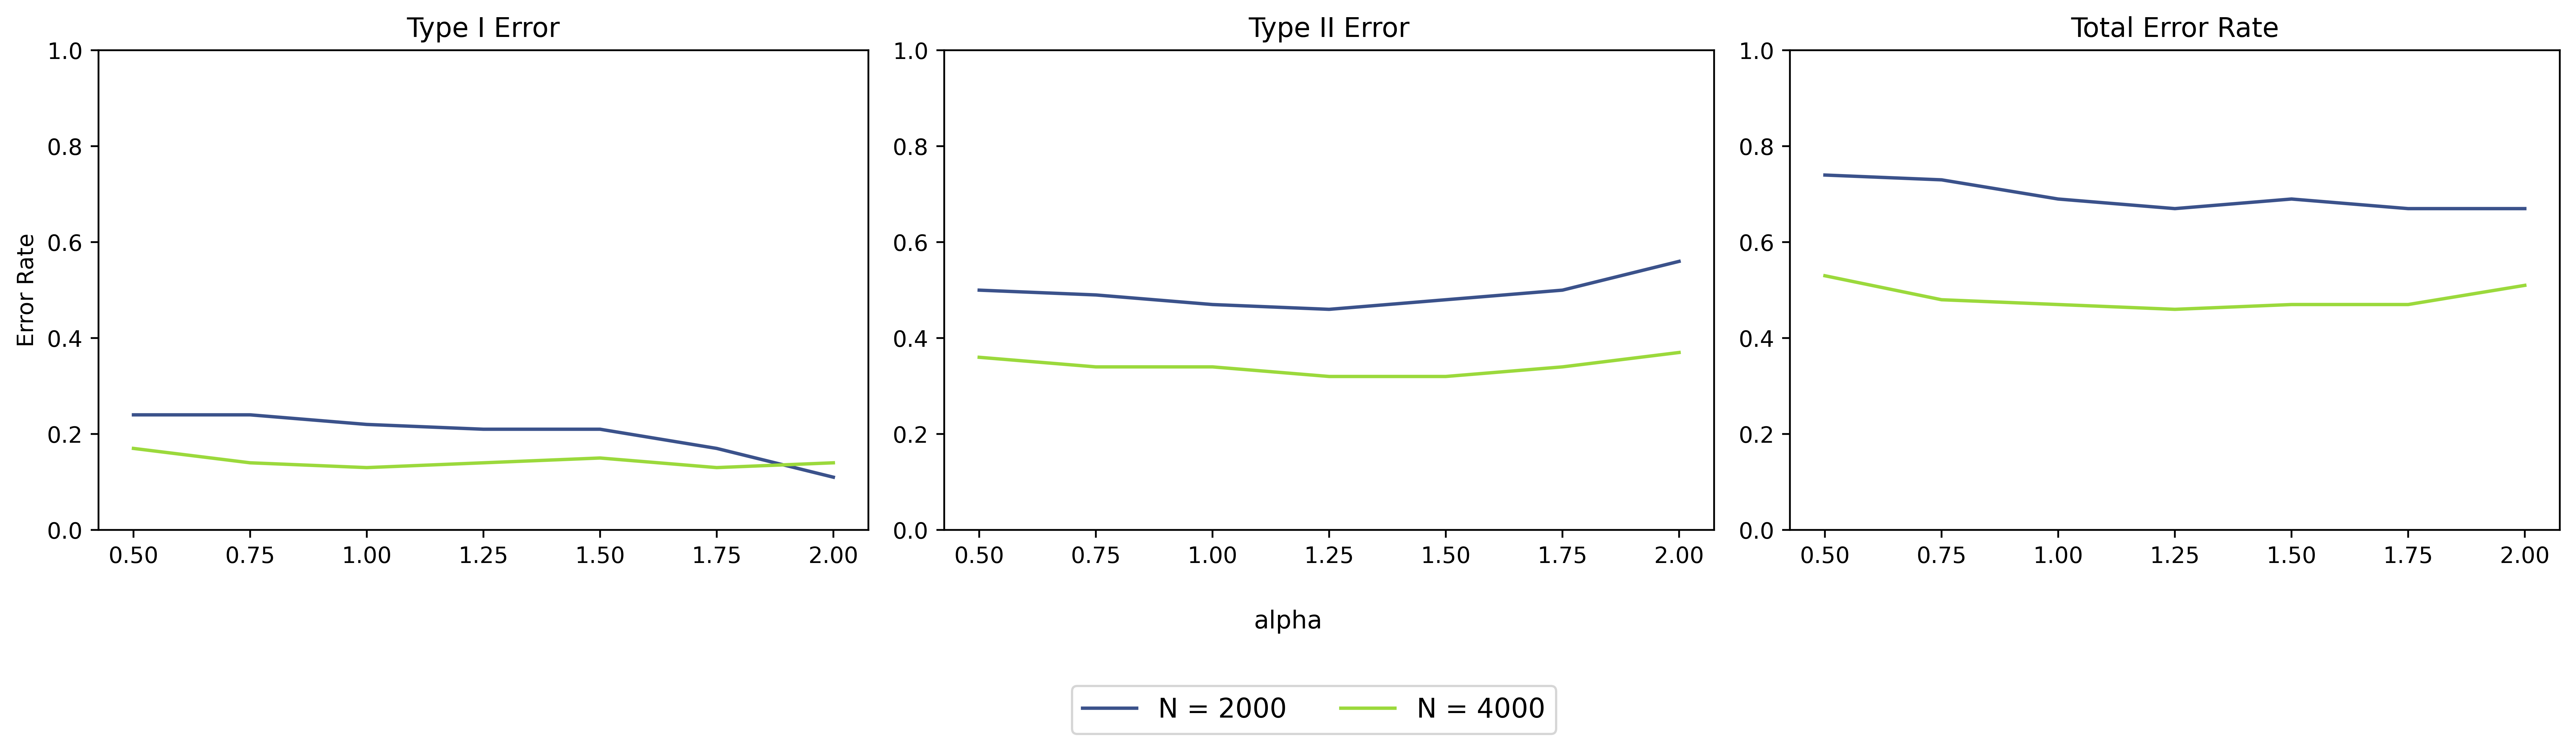

[{'n': 2000,
  'eI': [0.24, 0.24, 0.22, 0.21, 0.21, 0.17, 0.11],
  'eII': [0.5, 0.49, 0.47, 0.46, 0.48, 0.5, 0.56],
  'tim': 12308.421297311783},
 {'n': 4000,
  'eI': [0.17, 0.14, 0.13, 0.14, 0.15, 0.13, 0.14],
  'eII': [0.36, 0.34, 0.34, 0.32, 0.32, 0.34, 0.37],
  'tim': 19105.955444574356}]

In [4]:
cit = cmiknn
results = ecit_simu_alpha(n_list=n_list, t=t, cit=cit, k=k, alphas=alphas)
show_results_choose(results, alphas)
results

n=2000:   0%|                                                                                                         | 0/100 [00:00<?, ?it/s]

n=2000:   1%|▉                                                                                             | 1/100 [01:45<2:53:57, 105.43s/it]

n=2000:   2%|█▉                                                                                            | 2/100 [03:29<2:50:38, 104.47s/it]

n=2000:   3%|██▊                                                                                           | 3/100 [05:15<2:50:05, 105.21s/it]

n=2000:   4%|███▊                                                                                          | 4/100 [06:54<2:44:43, 102.95s/it]

n=2000:   5%|████▋                                                                                         | 5/100 [08:31<2:39:34, 100.78s/it]

n=2000:   6%|█████▋                                                                                        | 6/100 [10:13<2:38:19, 101.06s/it]

n=2000:   7%|██████▋                                                                                        | 7/100 [11:51<2:34:58, 99.99s/it]

n=2000:   8%|███████▌                                                                                      | 8/100 [13:34<2:34:50, 100.99s/it]

n=2000:   9%|████████▍                                                                                     | 9/100 [15:14<2:32:42, 100.69s/it]

n=2000:  10%|█████████▍                                                                                    | 10/100 [16:52<2:29:52, 99.92s/it]

n=2000:  11%|██████████▎                                                                                   | 11/100 [18:32<2:28:07, 99.86s/it]

n=2000:  12%|███████████▏                                                                                 | 12/100 [20:14<2:27:24, 100.50s/it]

n=2000:  13%|████████████                                                                                 | 13/100 [21:54<2:25:47, 100.55s/it]

n=2000:  14%|█████████████                                                                                | 14/100 [23:34<2:23:47, 100.32s/it]

n=2000:  15%|█████████████▉                                                                               | 15/100 [25:16<2:22:50, 100.83s/it]

n=2000:  16%|███████████████                                                                               | 16/100 [26:54<2:19:56, 99.95s/it]

n=2000:  17%|███████████████▊                                                                             | 17/100 [28:35<2:18:45, 100.31s/it]

n=2000:  18%|████████████████▉                                                                             | 18/100 [30:14<2:16:21, 99.78s/it]

n=2000:  19%|█████████████████▊                                                                            | 19/100 [31:52<2:14:06, 99.35s/it]

n=2000:  20%|██████████████████▌                                                                          | 20/100 [33:37<2:14:51, 101.15s/it]

n=2000:  21%|███████████████████▌                                                                         | 21/100 [35:15<2:11:45, 100.07s/it]

n=2000:  22%|████████████████████▍                                                                        | 22/100 [36:56<2:10:16, 100.21s/it]

n=2000:  23%|█████████████████████▌                                                                        | 23/100 [38:35<2:08:18, 99.99s/it]

n=2000:  24%|██████████████████████▎                                                                      | 24/100 [40:17<2:07:15, 100.47s/it]

n=2000:  25%|███████████████████████▎                                                                     | 25/100 [42:03<2:07:46, 102.21s/it]

n=2000:  26%|████████████████████████▏                                                                    | 26/100 [43:44<2:05:38, 101.87s/it]

n=2000:  27%|█████████████████████████                                                                    | 27/100 [45:24<2:03:07, 101.20s/it]

n=2000:  28%|██████████████████████████                                                                   | 28/100 [47:11<2:03:37, 103.02s/it]

n=2000:  29%|██████████████████████████▉                                                                  | 29/100 [48:55<2:02:09, 103.24s/it]

n=2000:  30%|███████████████████████████▉                                                                 | 30/100 [50:37<2:00:06, 102.95s/it]

n=2000:  31%|████████████████████████████▊                                                                | 31/100 [52:17<1:57:31, 102.19s/it]

n=2000:  32%|█████████████████████████████▊                                                               | 32/100 [53:57<1:54:55, 101.41s/it]

n=2000:  33%|██████████████████████████████▋                                                              | 33/100 [55:37<1:52:57, 101.16s/it]

n=2000:  34%|███████████████████████████████▌                                                             | 34/100 [57:19<1:51:15, 101.15s/it]

n=2000:  35%|████████████████████████████████▌                                                            | 35/100 [59:00<1:49:48, 101.36s/it]

n=2000:  36%|████████████████████████████████▊                                                          | 36/100 [1:00:42<1:48:09, 101.39s/it]

n=2000:  37%|█████████████████████████████████▋                                                         | 37/100 [1:02:29<1:48:22, 103.21s/it]

n=2000:  38%|██████████████████████████████████▌                                                        | 38/100 [1:04:13<1:46:52, 103.43s/it]

n=2000:  39%|███████████████████████████████████▍                                                       | 39/100 [1:05:51<1:43:28, 101.77s/it]

n=2000:  40%|████████████████████████████████████▍                                                      | 40/100 [1:07:31<1:41:14, 101.24s/it]

n=2000:  41%|█████████████████████████████████████▎                                                     | 41/100 [1:09:11<1:39:16, 100.96s/it]

n=2000:  42%|██████████████████████████████████████▏                                                    | 42/100 [1:10:53<1:37:48, 101.19s/it]

n=2000:  43%|███████████████████████████████████████▏                                                   | 43/100 [1:12:32<1:35:27, 100.48s/it]

n=2000:  44%|████████████████████████████████████████                                                   | 44/100 [1:14:12<1:33:44, 100.44s/it]

n=2000:  45%|█████████████████████████████████████████▍                                                  | 45/100 [1:15:50<1:31:21, 99.67s/it]

n=2000:  46%|█████████████████████████████████████████▊                                                 | 46/100 [1:17:31<1:30:07, 100.13s/it]

n=2000:  47%|██████████████████████████████████████████▊                                                | 47/100 [1:19:14<1:29:03, 100.83s/it]

n=2000:  48%|████████████████████████████████████████████▏                                               | 48/100 [1:20:51<1:26:25, 99.72s/it]

n=2000:  49%|████████████████████████████████████████████▌                                              | 49/100 [1:22:34<1:25:38, 100.76s/it]

n=2000:  50%|█████████████████████████████████████████████▌                                             | 50/100 [1:24:15<1:23:54, 100.69s/it]

n=2000:  51%|██████████████████████████████████████████████▍                                            | 51/100 [1:25:54<1:21:46, 100.14s/it]

n=2000:  52%|███████████████████████████████████████████████▎                                           | 52/100 [1:27:38<1:21:09, 101.45s/it]

n=2000:  53%|████████████████████████████████████████████████▏                                          | 53/100 [1:29:17<1:18:48, 100.60s/it]

n=2000:  54%|█████████████████████████████████████████████████▏                                         | 54/100 [1:30:57<1:17:09, 100.63s/it]

n=2000:  55%|██████████████████████████████████████████████████                                         | 55/100 [1:32:37<1:15:20, 100.46s/it]

n=2000:  56%|██████████████████████████████████████████████████▉                                        | 56/100 [1:34:19<1:13:56, 100.84s/it]

n=2000:  57%|███████████████████████████████████████████████████▊                                       | 57/100 [1:35:59<1:12:04, 100.57s/it]

n=2000:  58%|████████████████████████████████████████████████████▊                                      | 58/100 [1:37:42<1:10:55, 101.32s/it]

n=2000:  59%|█████████████████████████████████████████████████████▋                                     | 59/100 [1:39:24<1:09:17, 101.41s/it]

n=2000:  60%|██████████████████████████████████████████████████████▌                                    | 60/100 [1:41:07<1:08:00, 102.02s/it]

n=2000:  61%|███████████████████████████████████████████████████████▌                                   | 61/100 [1:42:48<1:06:01, 101.58s/it]

n=2000:  62%|████████████████████████████████████████████████████████▍                                  | 62/100 [1:44:34<1:05:09, 102.89s/it]

n=2000:  63%|█████████████████████████████████████████████████████████▎                                 | 63/100 [1:46:14<1:02:52, 101.97s/it]

n=2000:  64%|██████████████████████████████████████████████████████████▏                                | 64/100 [1:47:50<1:00:11, 100.33s/it]

n=2000:  65%|████████████████████████████████████████████████████████████▍                                | 65/100 [1:49:32<58:45, 100.72s/it]

n=2000:  66%|█████████████████████████████████████████████████████████████▍                               | 66/100 [1:51:10<56:41, 100.04s/it]

n=2000:  67%|██████████████████████████████████████████████████████████████▎                              | 67/100 [1:52:56<55:58, 101.78s/it]

n=2000:  68%|███████████████████████████████████████████████████████████████▏                             | 68/100 [1:54:37<54:10, 101.59s/it]

n=2000:  69%|████████████████████████████████████████████████████████████████▏                            | 69/100 [1:56:18<52:22, 101.38s/it]

n=2000:  70%|█████████████████████████████████████████████████████████████████                            | 70/100 [1:57:57<50:21, 100.71s/it]

n=2000:  71%|██████████████████████████████████████████████████████████████████                           | 71/100 [1:59:37<48:34, 100.50s/it]

n=2000:  72%|██████████████████████████████████████████████████████████████████▉                          | 72/100 [2:01:18<46:53, 100.50s/it]

n=2000:  73%|███████████████████████████████████████████████████████████████████▉                         | 73/100 [2:03:01<45:37, 101.38s/it]

n=2000:  74%|████████████████████████████████████████████████████████████████████▊                        | 74/100 [2:04:42<43:53, 101.28s/it]

n=2000:  75%|█████████████████████████████████████████████████████████████████████▊                       | 75/100 [2:06:21<41:55, 100.62s/it]

n=2000:  76%|██████████████████████████████████████████████████████████████████████▋                      | 76/100 [2:08:00<40:04, 100.18s/it]

n=2000:  77%|████████████████████████████████████████████████████████████████████████▍                     | 77/100 [2:09:40<38:16, 99.87s/it]

n=2000:  78%|████████████████████████████████████████████████████████████████████████▌                    | 78/100 [2:11:23<37:00, 100.94s/it]

n=2000:  79%|█████████████████████████████████████████████████████████████████████████▍                   | 79/100 [2:13:02<35:06, 100.33s/it]

n=2000:  80%|██████████████████████████████████████████████████████████████████████████▍                  | 80/100 [2:14:43<33:30, 100.50s/it]

n=2000:  81%|███████████████████████████████████████████████████████████████████████████▎                 | 81/100 [2:16:23<31:49, 100.51s/it]

n=2000:  82%|████████████████████████████████████████████████████████████████████████████▎                | 82/100 [2:18:03<30:05, 100.29s/it]

n=2000:  83%|█████████████████████████████████████████████████████████████████████████████▏               | 83/100 [2:19:42<28:19, 100.00s/it]

n=2000:  84%|██████████████████████████████████████████████████████████████████████████████               | 84/100 [2:21:25<26:53, 100.86s/it]

n=2000:  85%|███████████████████████████████████████████████████████████████████████████████              | 85/100 [2:23:06<25:14, 100.94s/it]

n=2000:  86%|███████████████████████████████████████████████████████████████████████████████▉             | 86/100 [2:24:51<23:48, 102.05s/it]

n=2000:  87%|████████████████████████████████████████████████████████████████████████████████▉            | 87/100 [2:26:30<21:55, 101.22s/it]

n=2000:  88%|█████████████████████████████████████████████████████████████████████████████████▊           | 88/100 [2:28:10<20:10, 100.85s/it]

/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


n=2000:  89%|██████████████████████████████████████████████████████████████████████████████████▊          | 89/100 [2:29:51<18:30, 100.91s/it]

n=2000:  90%|███████████████████████████████████████████████████████████████████████████████████▋         | 90/100 [2:31:31<16:44, 100.43s/it]

n=2000:  91%|████████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [2:33:14<15:12, 101.36s/it]

n=2000:  92%|█████████████████████████████████████████████████████████████████████████████████████▌       | 92/100 [2:34:55<13:30, 101.30s/it]

n=2000:  93%|██████████████████████████████████████████████████████████████████████████████████████▍      | 93/100 [2:36:34<11:43, 100.56s/it]

n=2000:  94%|████████████████████████████████████████████████████████████████████████████████████████▎     | 94/100 [2:38:12<09:58, 99.67s/it]

n=2000:  95%|█████████████████████████████████████████████████████████████████████████████████████████▎    | 95/100 [2:39:51<08:17, 99.60s/it]

n=2000:  96%|█████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [2:41:33<06:41, 100.26s/it]

n=2000:  97%|██████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [2:43:14<05:01, 100.45s/it]

n=2000:  98%|███████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [2:44:55<03:20, 100.48s/it]

n=2000:  99%|█████████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [2:46:33<01:39, 99.93s/it]

n=2000: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [2:48:15<00:00, 100.56s/it]

n=2000: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [2:48:15<00:00, 100.96s/it]

n=4000:   0%|                                                                                                         | 0/100 [00:00<?, ?it/s]

n=4000:   1%|▉                                                                                             | 1/100 [02:00<3:19:14, 120.75s/it]

n=4000:   2%|█▉                                                                                            | 2/100 [04:03<3:18:52, 121.76s/it]

n=4000:   3%|██▊                                                                                           | 3/100 [06:04<3:16:42, 121.67s/it]

n=4000:   4%|███▊                                                                                          | 4/100 [08:05<3:14:17, 121.43s/it]

n=4000:   5%|████▋                                                                                         | 5/100 [10:06<3:11:38, 121.04s/it]

n=4000:   6%|█████▋                                                                                        | 6/100 [12:08<3:10:05, 121.33s/it]

n=4000:   7%|██████▌                                                                                       | 7/100 [14:06<3:06:47, 120.51s/it]

n=4000:   8%|███████▌                                                                                      | 8/100 [16:07<3:04:53, 120.59s/it]

n=4000:   9%|████████▍                                                                                     | 9/100 [18:07<3:02:31, 120.34s/it]

n=4000:  10%|█████████▎                                                                                   | 10/100 [20:07<3:00:14, 120.16s/it]

n=4000:  11%|██████████▏                                                                                  | 11/100 [22:06<2:57:38, 119.76s/it]

n=4000:  12%|███████████▏                                                                                 | 12/100 [24:08<2:56:38, 120.44s/it]

n=4000:  13%|████████████                                                                                 | 13/100 [26:07<2:54:23, 120.27s/it]

n=4000:  14%|█████████████                                                                                | 14/100 [28:07<2:52:07, 120.08s/it]

n=4000:  15%|█████████████▉                                                                               | 15/100 [30:08<2:50:17, 120.20s/it]

n=4000:  16%|██████████████▉                                                                              | 16/100 [32:07<2:47:52, 119.92s/it]

n=4000:  17%|███████████████▊                                                                             | 17/100 [34:06<2:45:44, 119.82s/it]

n=4000:  18%|████████████████▋                                                                            | 18/100 [36:06<2:43:48, 119.86s/it]

n=4000:  19%|█████████████████▋                                                                           | 19/100 [38:08<2:42:41, 120.52s/it]

n=4000:  20%|██████████████████▌                                                                          | 20/100 [40:07<2:40:04, 120.06s/it]

n=4000:  21%|███████████████████▌                                                                         | 21/100 [42:08<2:38:05, 120.07s/it]

n=4000:  22%|████████████████████▍                                                                        | 22/100 [44:08<2:36:18, 120.24s/it]

n=4000:  23%|█████████████████████▍                                                                       | 23/100 [46:08<2:34:06, 120.09s/it]

n=4000:  24%|██████████████████████▎                                                                      | 24/100 [48:07<2:31:54, 119.93s/it]

n=4000:  25%|███████████████████████▎                                                                     | 25/100 [50:10<2:30:56, 120.75s/it]

n=4000:  26%|████████████████████████▏                                                                    | 26/100 [52:11<2:28:57, 120.78s/it]

n=4000:  27%|█████████████████████████                                                                    | 27/100 [54:11<2:26:34, 120.48s/it]

n=4000:  28%|██████████████████████████                                                                   | 28/100 [56:13<2:25:20, 121.12s/it]

n=4000:  29%|██████████████████████████▉                                                                  | 29/100 [58:14<2:23:03, 120.90s/it]

n=4000:  30%|███████████████████████████▎                                                               | 30/100 [1:00:14<2:20:43, 120.62s/it]

n=4000:  31%|████████████████████████████▏                                                              | 31/100 [1:02:16<2:19:08, 121.00s/it]

n=4000:  32%|█████████████████████████████                                                              | 32/100 [1:04:18<2:17:29, 121.32s/it]

n=4000:  33%|██████████████████████████████                                                             | 33/100 [1:06:17<2:14:51, 120.76s/it]

n=4000:  34%|██████████████████████████████▉                                                            | 34/100 [1:08:17<2:12:27, 120.41s/it]

n=4000:  35%|███████████████████████████████▊                                                           | 35/100 [1:10:16<2:10:09, 120.15s/it]

n=4000:  36%|████████████████████████████████▊                                                          | 36/100 [1:12:18<2:08:42, 120.67s/it]

n=4000:  37%|█████████████████████████████████▋                                                         | 37/100 [1:14:19<2:06:37, 120.59s/it]

n=4000:  38%|██████████████████████████████████▌                                                        | 38/100 [1:16:19<2:04:36, 120.59s/it]

n=4000:  39%|███████████████████████████████████▍                                                       | 39/100 [1:18:19<2:02:19, 120.32s/it]

n=4000:  40%|████████████████████████████████████▍                                                      | 40/100 [1:20:18<2:00:05, 120.09s/it]

n=4000:  41%|█████████████████████████████████████▎                                                     | 41/100 [1:22:20<1:58:26, 120.45s/it]

n=4000:  42%|██████████████████████████████████████▏                                                    | 42/100 [1:24:21<1:56:36, 120.63s/it]

n=4000:  43%|███████████████████████████████████████▏                                                   | 43/100 [1:26:22<1:54:53, 120.93s/it]

n=4000:  44%|████████████████████████████████████████                                                   | 44/100 [1:28:23<1:52:40, 120.72s/it]

n=4000:  45%|████████████████████████████████████████▉                                                  | 45/100 [1:30:24<1:50:45, 120.82s/it]

n=4000:  46%|█████████████████████████████████████████▊                                                 | 46/100 [1:32:26<1:49:12, 121.35s/it]

n=4000:  47%|██████████████████████████████████████████▊                                                | 47/100 [1:34:28<1:47:11, 121.35s/it]

n=4000:  48%|███████████████████████████████████████████▋                                               | 48/100 [1:36:28<1:44:58, 121.13s/it]

n=4000:  49%|████████████████████████████████████████████▌                                              | 49/100 [1:38:29<1:42:47, 120.93s/it]

n=4000:  50%|█████████████████████████████████████████████▌                                             | 50/100 [1:40:28<1:40:27, 120.54s/it]

n=4000:  51%|██████████████████████████████████████████████▍                                            | 51/100 [1:42:28<1:38:12, 120.25s/it]

n=4000:  52%|███████████████████████████████████████████████▎                                           | 52/100 [1:44:31<1:36:58, 121.22s/it]

n=4000:  53%|████████████████████████████████████████████████▏                                          | 53/100 [1:46:32<1:34:49, 121.05s/it]

n=4000:  54%|█████████████████████████████████████████████████▏                                         | 54/100 [1:48:33<1:32:45, 120.98s/it]

n=4000:  55%|██████████████████████████████████████████████████                                         | 55/100 [1:50:34<1:30:47, 121.06s/it]

n=4000:  56%|██████████████████████████████████████████████████▉                                        | 56/100 [1:52:35<1:28:45, 121.04s/it]

n=4000:  57%|███████████████████████████████████████████████████▊                                       | 57/100 [1:54:35<1:26:29, 120.69s/it]

n=4000:  58%|████████████████████████████████████████████████████▊                                      | 58/100 [1:56:35<1:24:15, 120.37s/it]

n=4000:  59%|█████████████████████████████████████████████████████▋                                     | 59/100 [1:58:36<1:22:28, 120.70s/it]

n=4000:  60%|██████████████████████████████████████████████████████▌                                    | 60/100 [2:00:35<1:20:08, 120.21s/it]

n=4000:  61%|███████████████████████████████████████████████████████▌                                   | 61/100 [2:02:35<1:17:59, 120.00s/it]

n=4000:  62%|████████████████████████████████████████████████████████▍                                  | 62/100 [2:04:34<1:15:59, 119.97s/it]

n=4000:  63%|█████████████████████████████████████████████████████████▎                                 | 63/100 [2:06:35<1:14:05, 120.14s/it]

n=4000:  64%|██████████████████████████████████████████████████████████▏                                | 64/100 [2:08:35<1:12:05, 120.17s/it]

n=4000:  65%|███████████████████████████████████████████████████████████▏                               | 65/100 [2:10:36<1:10:09, 120.28s/it]

n=4000:  66%|████████████████████████████████████████████████████████████                               | 66/100 [2:12:38<1:08:31, 120.93s/it]

n=4000:  67%|████████████████████████████████████████████████████████████▉                              | 67/100 [2:14:38<1:06:15, 120.48s/it]

n=4000:  68%|█████████████████████████████████████████████████████████████▉                             | 68/100 [2:16:39<1:04:25, 120.81s/it]

n=4000:  69%|██████████████████████████████████████████████████████████████▊                            | 69/100 [2:18:40<1:02:24, 120.77s/it]

n=4000:  70%|███████████████████████████████████████████████████████████████▋                           | 70/100 [2:20:40<1:00:15, 120.51s/it]

n=4000:  71%|██████████████████████████████████████████████████████████████████                           | 71/100 [2:22:40<58:14, 120.50s/it]

n=4000:  72%|██████████████████████████████████████████████████████████████████▉                          | 72/100 [2:24:42<56:22, 120.81s/it]

n=4000:  73%|███████████████████████████████████████████████████████████████████▉                         | 73/100 [2:26:45<54:39, 121.45s/it]

n=4000:  74%|████████████████████████████████████████████████████████████████████▊                        | 74/100 [2:28:45<52:27, 121.07s/it]

n=4000:  75%|█████████████████████████████████████████████████████████████████████▊                       | 75/100 [2:30:47<50:31, 121.27s/it]

n=4000:  76%|██████████████████████████████████████████████████████████████████████▋                      | 76/100 [2:32:48<48:34, 121.42s/it]

n=4000:  77%|███████████████████████████████████████████████████████████████████████▌                     | 77/100 [2:34:49<46:28, 121.25s/it]

n=4000:  78%|████████████████████████████████████████████████████████████████████████▌                    | 78/100 [2:36:49<44:17, 120.78s/it]

n=4000:  79%|█████████████████████████████████████████████████████████████████████████▍                   | 79/100 [2:38:49<42:09, 120.45s/it]

n=4000:  80%|██████████████████████████████████████████████████████████████████████████▍                  | 80/100 [2:40:47<39:58, 119.91s/it]

n=4000:  81%|███████████████████████████████████████████████████████████████████████████▎                 | 81/100 [2:42:49<38:07, 120.40s/it]

n=4000:  82%|████████████████████████████████████████████████████████████████████████████▎                | 82/100 [2:44:49<36:04, 120.27s/it]

n=4000:  83%|█████████████████████████████████████████████████████████████████████████████▏               | 83/100 [2:46:52<34:17, 121.06s/it]

n=4000:  84%|██████████████████████████████████████████████████████████████████████████████               | 84/100 [2:48:52<32:12, 120.75s/it]

n=4000:  85%|███████████████████████████████████████████████████████████████████████████████              | 85/100 [2:50:54<30:19, 121.27s/it]

n=4000:  86%|███████████████████████████████████████████████████████████████████████████████▉             | 86/100 [2:52:54<28:13, 120.94s/it]

n=4000:  87%|████████████████████████████████████████████████████████████████████████████████▉            | 87/100 [2:54:56<26:15, 121.15s/it]

n=4000:  88%|█████████████████████████████████████████████████████████████████████████████████▊           | 88/100 [2:56:54<24:03, 120.31s/it]

/usr/local/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


n=4000:  89%|██████████████████████████████████████████████████████████████████████████████████▊          | 89/100 [2:58:57<22:12, 121.10s/it]

n=4000:  90%|███████████████████████████████████████████████████████████████████████████████████▋         | 90/100 [3:00:56<20:02, 120.24s/it]

n=4000:  91%|████████████████████████████████████████████████████████████████████████████████████▋        | 91/100 [3:02:59<18:10, 121.14s/it]

n=4000:  92%|█████████████████████████████████████████████████████████████████████████████████████▌       | 92/100 [3:05:01<16:12, 121.51s/it]

n=4000:  93%|██████████████████████████████████████████████████████████████████████████████████████▍      | 93/100 [3:07:04<14:13, 121.90s/it]

n=4000:  94%|███████████████████████████████████████████████████████████████████████████████████████▍     | 94/100 [3:09:06<12:10, 121.78s/it]

n=4000:  95%|████████████████████████████████████████████████████████████████████████████████████████▎    | 95/100 [3:11:06<10:07, 121.50s/it]

n=4000:  96%|█████████████████████████████████████████████████████████████████████████████████████████▎   | 96/100 [3:13:08<08:06, 121.53s/it]

n=4000:  97%|██████████████████████████████████████████████████████████████████████████████████████████▏  | 97/100 [3:15:09<06:04, 121.51s/it]

n=4000:  98%|███████████████████████████████████████████████████████████████████████████████████████████▏ | 98/100 [3:17:10<04:02, 121.30s/it]

n=4000:  99%|████████████████████████████████████████████████████████████████████████████████████████████ | 99/100 [3:19:12<02:01, 121.43s/it]

n=4000: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [3:21:15<00:00, 121.83s/it]

n=4000: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [3:21:15<00:00, 120.75s/it]

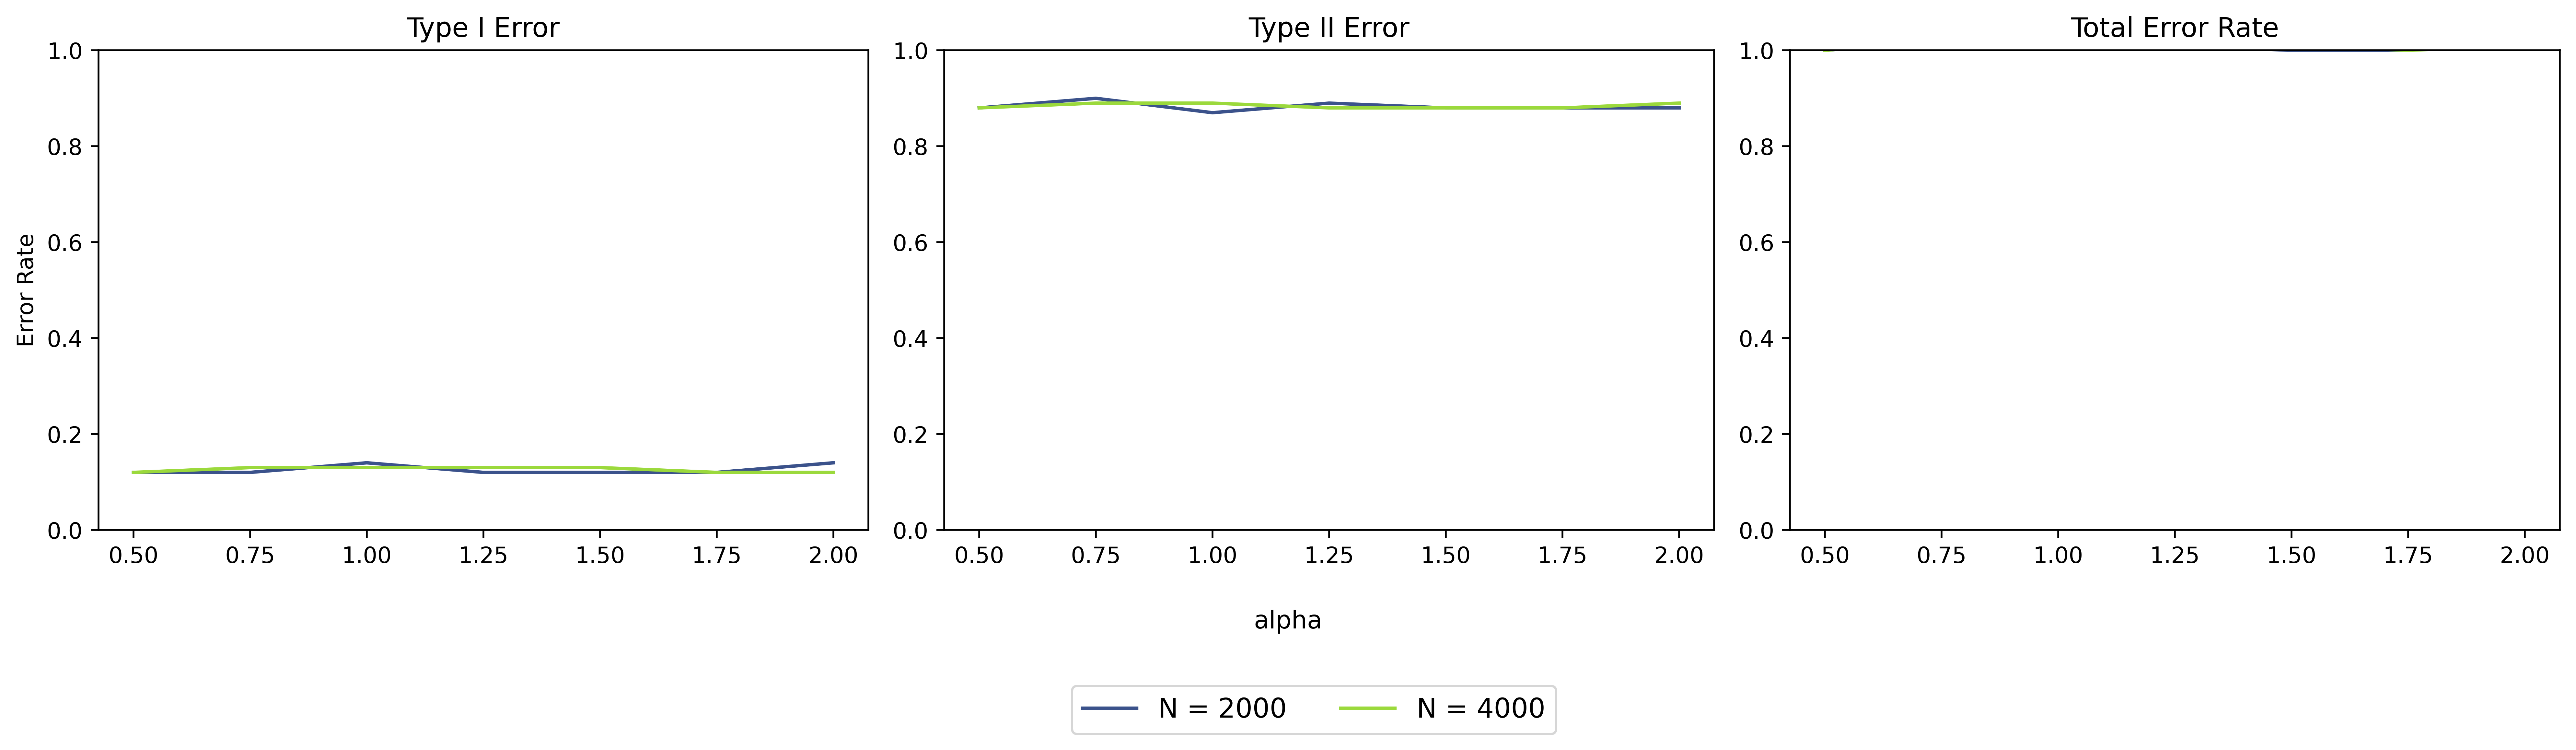

[{'n': 2000,
  'eI': [0.12, 0.12, 0.14, 0.12, 0.12, 0.12, 0.14],
  'eII': [0.88, 0.9, 0.87, 0.89, 0.88, 0.88, 0.88],
  'tim': 10095.7029504776},
 {'n': 4000,
  'eI': [0.12, 0.13, 0.13, 0.13, 0.13, 0.12, 0.12],
  'eII': [0.88, 0.89, 0.89, 0.88, 0.88, 0.88, 0.89],
  'tim': 12075.239432573318}]

In [5]:
cit = ccit
results = ecit_simu_alpha(n_list=n_list, t=t, cit=cit, k=k, alphas=alphas)
show_results_choose(results, alphas)
results